## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [2]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_30_copy.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_30_copy.csv')

In [3]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

### 인코딩 

In [4]:
Total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256342 entries, 0 to 256341
Columns: 104 entries, 시술_시기_코드 to 혼합된_난자_수_비율
dtypes: float64(45), int64(50), object(9)
memory usage: 203.4+ MB


In [5]:
Total_categorical_columns = [
    "시술_시기_코드",
    "시술_당시_나이",
    "특정_시술_유형",
    "배란_유도_유형",
    "단일_배아_이식_여부",
    "착상_전_유전_진단_사용_여부",
    "배아_생성_주요_이유",
    "총_생성_배아_수",
    "미세주입된_난자_수",
    "미세주입에서_생성된_배아_수",
    "이식된_배아_수",
    "미세주입_배아_이식_수",
    "저장된_배아_수",
    "미세주입_후_저장된_배아_수",
    "해동된_배아_수",
    "해동_난자_수",
    "수집된_신선_난자_수",
    "저장된_신선_난자_수",
    "혼합된_난자_수",
    "파트너_정자와_혼합된_난자_수",
    "기증자_정자와_혼합된_난자_수",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이",
    "동결_배아_사용_여부",
    "신선_배아_사용_여부",
    "기증_배아_사용_여부",
    "대리모_여부",
    "ICSI_배아_이식_비율",
    "ICSI_배아_생성_비율",
    "ICSI_성공률"
]

In [6]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [7]:
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X, Total_y, test_size=0.2, random_state=42)

### Total 데이터


--- Model Performance ---
Model Accuracy: 0.7261112953246601
Model F1 Score: 0.41787579802669766
Model AUC: 0.737925527386008


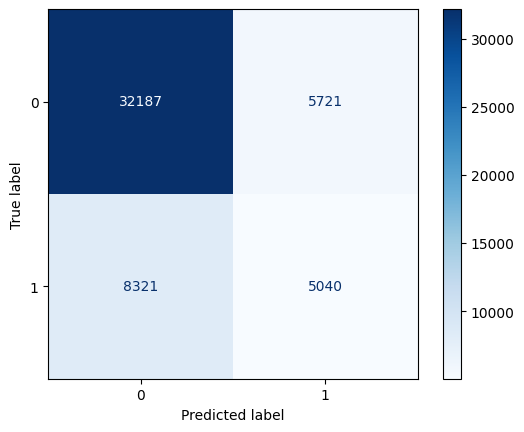

In [8]:
import catboost as cb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
Total_model = cb.CatBoostClassifier(
    iterations=2717,  # 트리의 개수 (부스팅 반복 횟수)
    learning_rate=0.011061644230637697,  # 학습률 (0과 1 사이의 값)
    depth=6,  # 트리의 최대 깊이
    l2_leaf_reg=3.9960092400982936,  # L2 정규화 (Ridge) 계수
    random_strength=3.3096409895054855,  # 랜덤 강도
    bagging_temperature=0.8870073463319801,  # 배깅 온도
    border_count=255,  # 경계 개수 (CatBoost에서 사용)
    scale_pos_weight=1.5017883088044244,  # 클래스 불균형을 처리하기 위한 가중치
    random_state=42,  # 랜덤 시드 값 (재현성을 위해 설정)
    eval_metric='AUC',  # 모델 성능 평가 지표
    logging_level='Silent',  # 학습 과정의 출력을 제어 (Silent로 설정하여 출력을 억제)
    boosting_type='Plain',  # 부스팅 유형 ('Plain' 또는 'Ordered')
    thread_count=-1  # 모든 CPU 코어 사용
)

# 모델 학습
Total_model.fit(Total_X_train, Total_y_train, eval_set=(Total_X_test, Total_y_test), verbose=False)

# 예측
y_pred = Total_model.predict(Total_X_test)
y_pred_proba = Total_model.predict_proba(Total_X_test)[:, 1]

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Total_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

데이콘 PUBLIC xx

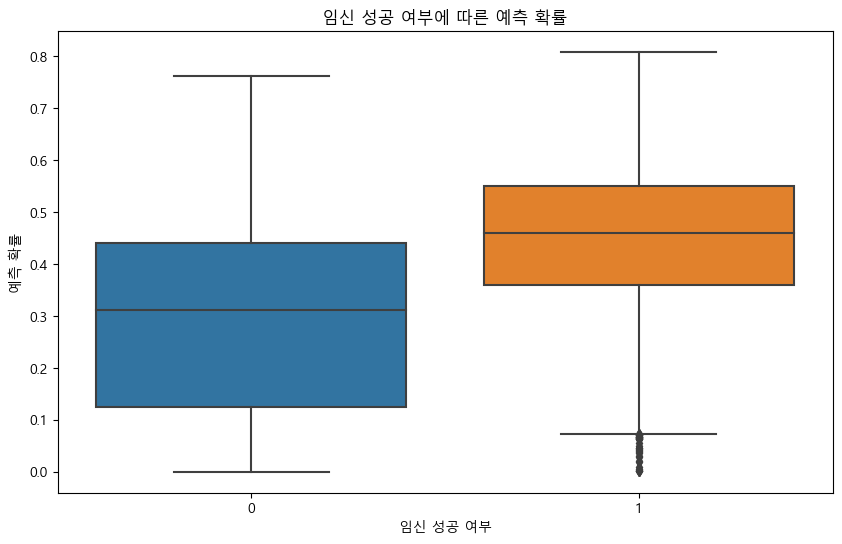

In [9]:
import platform
from matplotlib import rc

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# y_pred_proba를 임신_성공_여부에 따라 박스플롯으로 출력
result_df = pd.DataFrame({'임신_성공_여부': Total_y_test, '예측_확률': y_pred_proba})

# 박스플롯 출력
plt.figure(figsize=(10, 6))
sns.boxplot(x='임신_성공_여부', y='예측_확률', data=result_df)
plt.title('임신 성공 여부에 따른 예측 확률')
plt.xlabel('임신 성공 여부')
plt.ylabel('예측 확률')
plt.show()

## 제출

In [20]:
# 모델 학습 및 예측
Total_model.fit(Total_X, Total_y)
Total_pred_proba = Total_model.predict_proba(Total_test.drop('ID', axis=1))[:, 1]
Total_test['probability'] = Total_pred_proba

# 최종 제출 파일 생성
submission = Total_test[['ID', 'probability']]
submission = submission.sort_values(by='ID')

In [ ]:
# 제출 파일 저장
submission.to_csv('../submission/code30_total_submit_copy_cat.csv', index=False, encoding='utf-8')

----

.